In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from numpy import random

In [3]:
from obs import h_operator
op = "cubic"
sigma = 1.0

In [69]:
nmem = 20
nx = 40
#xf = random.normal(0, scale=sigma, size=nx*nmem).reshape(nx, nmem)
xf = random.rand(nx*nmem).reshape(nx, nmem)
xf = (xf - np.mean(xf))*sigma

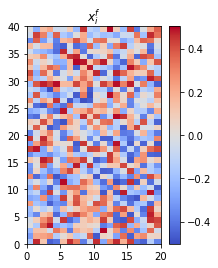

In [70]:
cmap = "coolwarm"
x = np.arange(nx+1)
y = np.arange(nmem+1)
vlim = max(np.max(xf), abs(np.min(xf)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, xf, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$x^f_i$")
plt.rc('text', usetex=False)
plt.show()

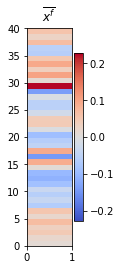

In [71]:
xf_ = np.mean(xf, axis=1)[:, None]
y_ = np.arange(1+1)
vlim = max(np.max(xf_), abs(np.min(xf_)))
plt.figure(figsize=(1, 4))
mappable = plt.pcolor(y_, x, xf_, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$\overline{x^f}$")
plt.rc('text', usetex=False)
plt.show()

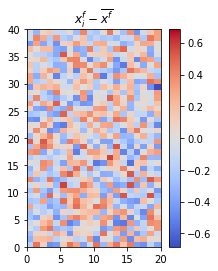

In [72]:
dxf = xf - xf_
vlim = max(np.max(dxf), abs(np.min(dxf)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dxf, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$x^f_i-\overline{x^f}$")
plt.rc('text', usetex=False)
plt.show()

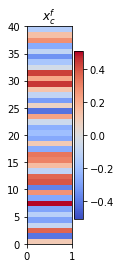

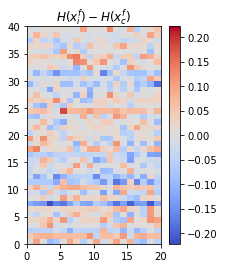

In [76]:
#xfc = random.normal(0, scale=sigma, size=nx)[:, None]
xfc = random.rand(nx)[:, None]
xfc = (xfc - np.mean(xfc))*sigma
vlim = max(np.max(xfc), abs(np.min(xfc)))
plt.figure(figsize=(1, 4))
mappable = plt.pcolor(y_, x, xfc, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$x^f_c$")
plt.rc('text', usetex=False)
plt.show()
dyc = h_operator(xf, operator=op) - h_operator(xfc, operator=op)
vlim = max(np.max(dyc), abs(np.min(dyc)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dyc, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$H(x^f_i)-H(x^f_c)$")
plt.rc('text', usetex=False)
plt.show()

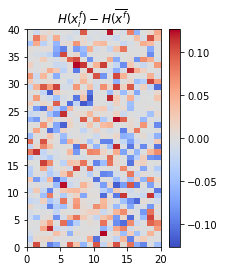

In [77]:
dy = h_operator(xf, operator=op) - h_operator(xf_, operator=op)
vlim = max(np.max(dy), abs(np.min(dy)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dy, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$H(x^f_i)-H(\overline{x^f})$")
plt.rc('text', usetex=False)
plt.show()

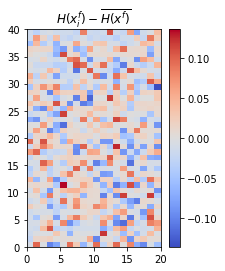

In [78]:
dyb = h_operator(xf, operator=op) - np.mean(h_operator(xf, operator=op), axis=1)[:, None]
vlim = max(np.max(dyb), abs(np.min(dyb)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dyb, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$H(x^f_i)-\overline{H(x^f)}$")
plt.rc('text', usetex=False)
plt.show()

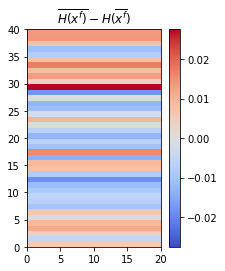

In [79]:
dif = dy - dyb
vlim = max(np.max(dif), abs(np.min(dif)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dif, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$\overline{H(x^f)}-H(\overline{x^f})$")
plt.rc('text', usetex=False)
plt.show()

In [88]:
import scipy.optimize as spo
from scipy.optimize import rosen, rosen_der
x0 = random.rand(10)
res = spo.minimize(rosen, x0, method='L-BFGS-B', jac=rosen_der, options={'disp':0})

In [90]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [94]:
res.x

array([0.99999983, 0.99999986, 1.00000023, 1.00000025, 1.00000009,
       1.0000001 , 1.00000014, 0.99999984, 0.99999958, 0.99999918])

In [101]:
from mlef import calc_j as mlef_calcj
from mlef import calc_grad_j as mlef_calcg
from mlef import precondition

In [141]:
nx = 81
nmem = 4
xc = random.normal(0, scale=1.0, size=nx)
y = random.normal(1.0, scale=0.5, size=nx)
pf = random.normal(0, scale=1.0, size=nx*nmem).reshape(nx,nmem)
htype = {"operator":"cubic", "perturbation":"mlef", "gamma":1}
rmat = np.eye(nx)*1.0
rinv = rmat @ rmat.T
dh = h_operator(xc[:, None]+pf, htype["operator"], htype["gamma"]) - h_operator(xc, htype["operator"], htype["gamma"])[:, None]
zmat = rmat @ dh
tmat, heinv, condh = precondition(zmat)
gmat = pf @ tmat
x0 = random.rand(nmem)*0.0
args_j = (xc, pf, y, tmat, gmat, heinv, rinv, htype)
print(mlef_calcj(x0, *args_j))
mlef_calcg(x0, *args_j)

eigenvalues=[2729.32246714 4836.17482391 7681.63398515 8998.83274764]
cond(hessian)=3.2962526792926523
488.5898061862267


array([-157.94348989,  210.88545583, 1095.8103816 ,  910.23273651])

In [142]:
spo.check_grad(mlef_calcj, mlef_calcg, x0, *args_j)

1442.02613392608

In [134]:
from mlefb import calc_j as mlefb_calcj
from mlefb import calc_grad_j as mlefb_calcg
from mlefb import precondition as preconditionb

In [143]:
eps = 1e-6
htype = {"operator":"cubic", "perturbation":"mlefb", "gamma":1}
args_b = (xc, pf, y, preconditionb, eps, rmat, htype)
print(mlefb_calcj(x0, *args_b))
mlefb_calcg(x0, *args_b)

488.58972347487025


array([-640.0187628 , -248.67237122,  638.85797912,  249.83315503])

In [144]:
spo.check_grad(mlefb_calcj, mlefb_calcg, x0, *args_b)

165.42316061594917

## Nonlinear observation operators

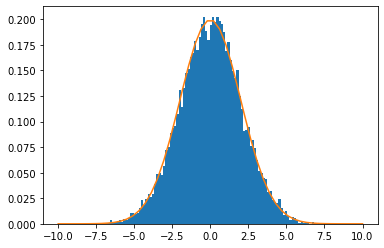

In [8]:
sigma = 2.0
r = random.normal(0.0, scale=sigma, size=10000)
x = np.linspace(-100,100)
x = x * 0.1
y = np.exp(-(x/sigma)**2/2)/np.sqrt(2*np.pi)/sigma
plt.hist(r, bins=100, density=True)
plt.plot(x, y)
plt.show()

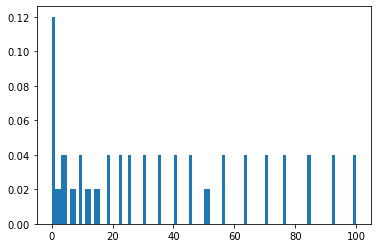

In [9]:
from obs import h_operator
op = "quadratic"
r2 = h_operator(x, op, sigma)
plt.hist(r2, bins=100, density=True)
plt.show()

## Lorenc(2003), Bowler et al.(2013)の再現

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from numpy import random
import obs
import importlib

(1000, 2)


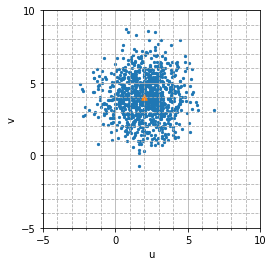

In [2]:
random.seed(514)
wmean = np.array([2.0,4.0])
wstdv = np.array([2.0,2.0])
nmem = 1000
wind = random.multivariate_normal(wmean, np.diag(wstdv), size=nmem)
print(wind.shape)
x = np.arange(-5,11)
fig, ax = plt.subplots()
ax.scatter(wind[:,0], wind[:,1], s=5)
ax.scatter(wmean[0], wmean[1], s=30, marker='^')
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_aspect("equal")
ax.set_xticks(x[::5])
ax.set_yticks(x[::5])
ax.set_xticks(x, minor=True)
ax.set_yticks(x, minor=True)
ax.grid(which="major")
ax.grid(which="minor", linestyle="dashed")
fig.savefig("initial_speed.png")
plt.show()

In [3]:
xf = wind.transpose()
xf_ = np.mean(xf, axis=1)
y = np.array([3.0]) #observation [m/s]
sig = 0.3 #observation error [m/s]
dx = 1.0
binv = np.diag(1.0/wstdv)
rmat = np.array([1.0 / sig]).reshape(-1,1)
rinv = np.array([1.0 / sig / sig]).reshape(-1,1)

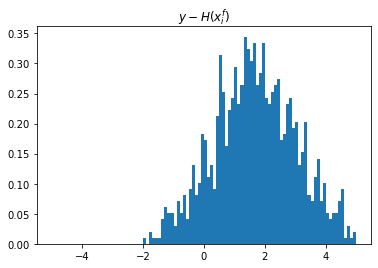

In [4]:
sf = obs.h_operator(xf, "speed", 1.0)
sf -= y
vlim = 5.0 #max(np.max(sa), -np.min(sa))
plt.hist(sf[0], bins=100, density=True, range=(-vlim,vlim))
plt.title(r"$y-H(x^f_i)$")
plt.savefig("initial_hist.png")
plt.show()

In [5]:
theta = np.linspace(0.0, 2.0*np.pi, 360)
rmin = y - sig
rmax = y + sig
xmin = rmin*np.cos(theta)
ymin = rmin*np.sin(theta)
xmax = rmax*np.cos(theta)
ymax = rmax*np.sin(theta)
#fig, ax = plt.subplots()
#ax.plot(xmin, ymin)
#ax.plot(xmax, ymax)
#ax.set_aspect("equal")
#plt.show()

In [5]:
from enkf import analysis
htype = {"operator":"speed","perturbation":"etkf","gamma":1}

In [7]:
import obs
print(xf.shape)
yobs = obs.h_operator(xf, htype["operator"], htype["gamma"])
print(yobs.shape)
yobs_ = obs.h_operator(xf_, htype["operator"], htype["gamma"])
print(yobs_.shape)
jh = obs.dhdx(xf_, htype["operator"], htype["gamma"])
print(jh.shape)

(2, 1000)
(1, 1000)
(1,)
(1, 2)


In [10]:
xa, xa_, pa, chi2, ds, condh = analysis(xf, xf_, y, sig, dx, htype, tlm=True)

save_dh=False cycle0
0.0010009599778893665


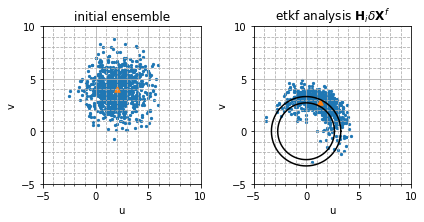

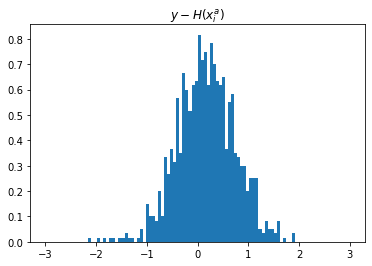

In [11]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
#ax[1].set_title(r"etkf analysis $H(x^f_i)-H(\overline{x^f})$")
ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("etkf-jh2_speed.png")
plt.show()
sa = obs.h_operator(xa, htype["operator"], htype["gamma"])
sa -= y
vlim = 3.0 #max(np.max(sa), -np.min(sa))
plt.hist(sa[0], bins=100, density=True, range=(-vlim,vlim))
plt.title(r"$y-H(x^a_i)$")
plt.savefig("etkf-jh2_hist.png")
plt.show()

In [8]:
htype = {"operator":"speed","perturbation":"srf","gamma":1}
xa, xa_, pa, chi2, ds, condh = analysis(xf, xf_, y, sig, dx, htype, tlm=True)

save_dh=False cycle0
0.0010009581078808368


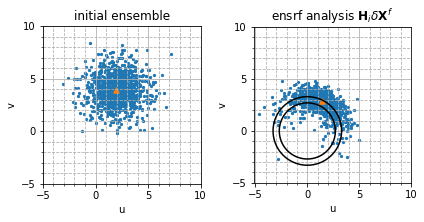

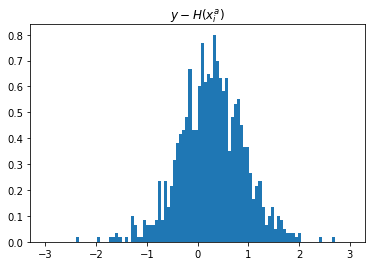

In [9]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
#ax[1].set_title(r"ensrf analysis $H(x^f_i)-H(\overline{x^f})$")
ax[1].set_title(r"ensrf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("ensrf-jh2_speed.png")
plt.show()

sa = obs.h_operator(xa, htype["operator"], htype["gamma"])
sa -= y
vlim = 3.0 #max(np.max(sa), -np.min(sa))
plt.hist(sa[0], bins=100, density=True, range=(-vlim,vlim))
plt.title(r"$y-H(x^a_i)$")
plt.savefig("ensrf-jh2_hist.png")
plt.show()

In [6]:
from mlef import analysis as analysis_mlef
htype = {"operator":"speed","perturbation":"mlef","gamma":1}

xfc = xf_[:]
#xfc = np.array([0.6*np.sqrt(5.0),1.2*np.sqrt(5.0)])
#xfc = np.array([3.0,0.0])
xc, pa, chi2, ds, condh = analysis_mlef(xf, xfc, y, rmat, rinv, htype)
xa = xc[:, None] + pa
print(xc)

2021-03-17 17:33:10,034 anl INFO save_dh=False
2021-03-17 17:33:10,446 anl INFO method=LBFGS
2021-03-17 17:33:10,446 anl INFO save_hist=False
2021-03-17 17:33:10,597 anl INFO check_grad=766.1148546957933
2021-03-17 17:33:10,599 anl INFO initial function value = 12.288471493329112
2021-03-17 17:33:10,599 anl INFO initial gradient norm = 740.3201671012974
2021-03-17 17:33:10,659 anl INFO minimization failed, FLAG = -1
2021-03-17 17:33:10,659 anl INFO iteration = 100
2021-03-17 17:33:10,660 anl INFO final function value = 7.8732870272432365
2021-03-17 17:33:10,661 anl INFO final gradient norm = 590.4275392557388
2021-03-17 17:33:11,066 anl INFO DOF = 0.999954832904188


[1.88061015 3.74476094]


In [12]:
import numpy.linalg as la
import obs
from mlef import precondition, calc_grad_j
dh = obs.h_operator(xf, htype["operator"], htype["gamma"]) - obs.h_operator(xfc, htype["operator"], htype["gamma"])[:, None]
zmat = rmat @ dh
tmat, heinv, condh = precondition(zmat)
pf = xf - xfc[:, None]
pf /= np.sqrt(nmem)
gmat = pf@tmat
pfinv = la.pinv(pf) #Moore-penrose pseudo inverse
tinv = la.inv(tmat)
ginv = tinv@pfinv
args = (xfc, pf, y, tmat, gmat, heinv, rinv, htype)
zeta0 = np.zeros(nmem)
djz = calc_grad_j(zeta0, *args)
djx = ginv.transpose()@djz
print(djx)

[ 973.84198457 1904.65607445]


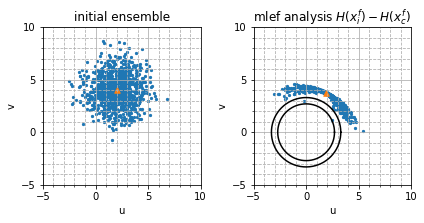

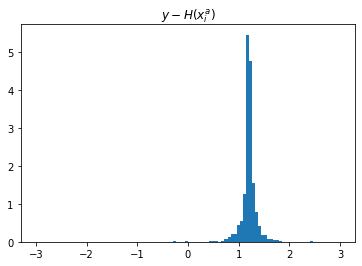

In [7]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
#ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].scatter(xfc[0], xfc[1], s=30, marker='^')
#ax[0].quiver(xfc[0], xfc[1], -djx[0], -djx[1], angles="xy", color="red", scale_units="xy", scale=500.0)
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xc[0], xc[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"mlef analysis $H(x^f_i)-H(x^f_c)$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
#fig.savefig("mlef_speed_scl.png")
plt.show()

sa = obs.h_operator(xa, htype["operator"], htype["gamma"])
sa -= y
vlim = 3.0 #max(np.max(sa), -np.min(sa))
plt.hist(sa[0], bins=100, density=True, range=(-vlim,vlim))
plt.title(r"$y-H(x^a_i)$")
#plt.savefig("mlef_hist_scl.png")
plt.show()

[13.26022474  3.90461125]
[13.32918086  8.55917721]
<class 'numpy.ndarray'>


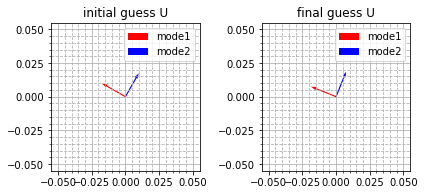

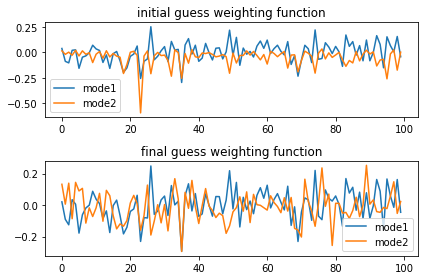

In [29]:
dh = obs.h_operator(xa, htype["operator"], htype["gamma"]) - obs.h_operator(xc, htype["operator"], htype["gamma"])[:, None]
zmat = rmat@dh
tmat, heinv, condh = precondition(zmat)
gamat = pf@tmat
# initial guess G
ui, si, vit = la.svd(gmat)
vi = vit.transpose()
print(si)
# final guess G
uf, sf, vft = la.svd(gamat)
vf = vft.transpose()
print(sf)
width = 0.1
mem = np.arange(nmem)
print(type(vi[:,0]))
x = np.linspace(-1.0, 1.0, 21, endpoint=True)*0.05
fig, ax = plt.subplots(1,2)
ax[0].quiver(ui[0,0], ui[1,0], angles="xy", color="red", label="mode1", scale_units="xy", scale=50.0)
ax[0].quiver(ui[0,1], ui[1,1], angles="xy", color="blue", label="mode2", scale_units="xy", scale=50.0)
ax[0].set_title("initial guess U")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].legend()
ax[1].quiver(uf[0,0], uf[1,0], angles="xy", color="red", label="mode1", scale_units="xy", scale=50.0)
ax[1].quiver(uf[0,1], uf[1,1], angles="xy", color="blue", label="mode2", scale_units="xy", scale=50.0)
ax[1].set_title("final guess U")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].legend()
fig.tight_layout()
plt.show()
fig, ax = plt.subplots(2)
ax[0].plot(vi[:,0], label="mode1")
ax[0].plot(vi[:,1], label="mode2")
ax[0].set_title("initial guess weighting function")
ax[0].legend()
ax[1].plot(vf[:,0], label="mode1")
ax[1].plot(vf[:,1], label="mode2")
ax[1].set_title("final guess weighting function")
ax[1].legend()
fig.tight_layout()
plt.show()

In [8]:
htype = {"operator":"speed","perturbation":"grad","gamma":1}

xfc = xf_[:]
#xfc = np.array([0.6*np.sqrt(5.0),1.2*np.sqrt(5.0)])
#xfc = np.array([3.0,0.0])
xc, pa, chi2, ds, condh = analysis_mlef(xf, xfc, y, rmat, rinv, htype)
xa = xc[:, None] + pa
print(xc - xfc)

2021-02-24 13:57:52,375 anl DEBUG dhdx=[[0.44638517 0.89484093]]
2021-02-24 13:57:52,376 anl INFO save_dh=False
2021-02-24 13:57:52,750 anl INFO save_hist=False
2021-02-24 13:57:52,885 anl INFO check_grad=758.3308159853507
2021-02-24 13:57:52,887 anl INFO initial function value = 12.288471493329112
2021-02-24 13:57:52,887 anl INFO initial gradient norm = 763.2882243974567
2021-02-24 13:57:52,936 anl INFO FLAG = -1
2021-02-24 13:57:52,936 anl INFO iteration = 102
2021-02-24 13:57:52,937 anl INFO final function value = 0.014165524982082116
2021-02-24 13:57:52,937 anl INFO final gradient norm = 25.37686457734069
2021-02-24 13:57:53,413 anl INFO DOF = 0.9999580171652726


[-1.19258734 -1.07566509]


In [45]:
pf = xf - xfc[:, None]
dh = obs.dhdx(xfc, htype["operator"], htype["gamma"])@pf
zmat = rmat @ dh
tmat, heinv, condh = precondition(zmat)
gmat = pf@tmat
pfinv = la.pinv(pf) #Moore-penrose pseudo inverse
tinv = la.inv(tmat)
ginv = tinv@pfinv
args = (xfc, pf, y, tmat, gmat, heinv, rinv, htype)
zeta0 = np.zeros(nmem)
djz = calc_grad_j(zeta0, *args)
djx = ginv.transpose()@djz
print(djx)

[1097.20469277 2227.62217686]


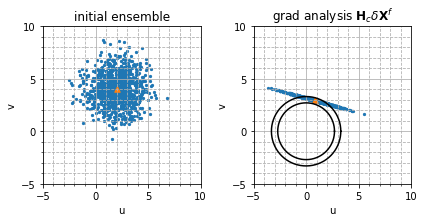

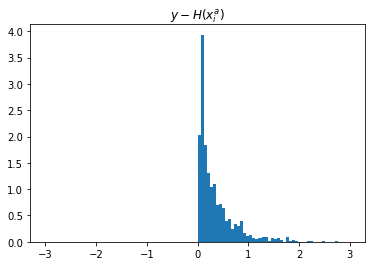

In [9]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
#ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].scatter(xfc[0], xfc[1], s=30, marker='^')
#ax[0].quiver(xfc[0], xfc[1], -djx[0], -djx[1], angles="xy", color="red", scale_units="xy", scale=500.0)
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xc[0], xc[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
#ax[1].set_title(r"grad analysis $H(x^f_i)-H(x^f_c)$")
ax[1].set_title(r"grad analysis $\mathbf{H}_c \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("grad_speed.png")
plt.show()

sa = obs.h_operator(xa, htype["operator"], htype["gamma"])
sa -= y
vlim = 3.0 #max(np.max(sa), -np.min(sa))
plt.hist(sa[0], bins=100, density=True, range=(-vlim,vlim))
plt.title(r"$y-H(x^a_i)$")
plt.savefig("grad_hist.png")
plt.show()

[44.10220941  0.29999347]
[44.78693523  0.29999326]
<class 'numpy.ndarray'>
[-0.05  -0.045 -0.04  -0.035 -0.03  -0.025 -0.02  -0.015 -0.01  -0.005
  0.     0.005  0.01   0.015  0.02   0.025  0.03   0.035  0.04   0.045
  0.05 ]


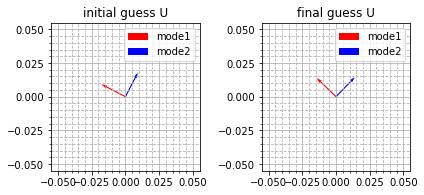

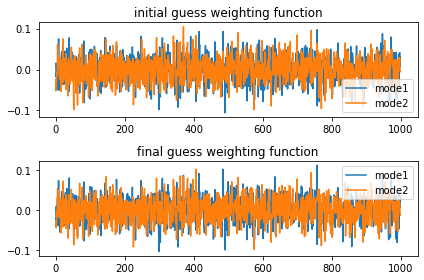

In [12]:
dh = obs.dhdx(xc, htype["operator"], htype["gamma"])@pf
zmat = rmat@dh
tmat, heinv, condh = precondition(zmat)
gamat = pf@tmat
# initial guess G
ui, si, vit = la.svd(gmat)
vi = vit.transpose()
print(si)
# final guess G
uf, sf, vft = la.svd(gamat)
vf = vft.transpose()
print(sf)
width = 0.1
mem = np.arange(nmem)
print(type(vi[:,0]))
x = np.linspace(-1.0, 1.0, 21, endpoint=True)*0.05
print(x)
fig, ax = plt.subplots(1,2)
ax[0].quiver(ui[0,0], ui[1,0], angles="xy", color="red", label="mode1", scale_units="xy", scale=50.0)
ax[0].quiver(ui[0,1], ui[1,1], angles="xy", color="blue", label="mode2", scale_units="xy", scale=50.0)
ax[0].set_title("initial guess U")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].legend()
ax[1].quiver(uf[0,0], uf[1,0], angles="xy", color="red", label="mode1", scale_units="xy", scale=50.0)
ax[1].quiver(uf[0,1], uf[1,1], angles="xy", color="blue", label="mode2", scale_units="xy", scale=50.0)
ax[1].set_title("final guess U")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].legend()
fig.tight_layout()
plt.show()
fig, ax = plt.subplots(2)
ax[0].plot(vi[:,0], label="mode1")
ax[0].plot(vi[:,1], label="mode2")
ax[0].set_title("initial guess weighting function")
ax[0].legend()
ax[1].plot(vf[:,0], label="mode1")
ax[1].plot(vf[:,1], label="mode2")
ax[1].set_title("final guess weighting function")
ax[1].legend()
fig.tight_layout()
plt.show()

In [6]:
import mlef05
importlib.reload(mlef05)
#from mlef05 import analysis as analysis_mlef05
htype = {"operator":"speed","perturbation":"mlef","gamma":1}

xfc = xf_[:]
#xfc = np.array([0.6*np.sqrt(5.0),1.2*np.sqrt(5.0)])
#xfc = np.array([3.0,0.0])
xc, pa, chi2 = mlef05.analysis(xf, xfc, y, rmat, rinv, htype, method="LBFGS", cgtype=None, icycle=1)
#xc, pa, chi2 = analysis_mlef05(xf, xfc, y, rmat, rinv, htype, method="LBFGS", cgtype=None, icycle=1)
xa = xc[:, None] + pa
print(xc - xfc)

2021-03-19 17:52:33,083 anl INFO save_dh=False
2021-03-19 17:52:33,295 anl DEBUG tmat=[[ 9.99934064e-01 -3.11023354e-04  2.77614806e-04 ...  1.94587158e-04
  -1.89862782e-04  1.46168296e-04]
 [-3.11023354e-04  9.98532887e-01  1.30952304e-03 ...  9.17877438e-04
  -8.95592321e-04  6.89483224e-04]
 [ 2.77614806e-04  1.30952304e-03  9.98831139e-01 ... -8.19283708e-04
   7.99392345e-04 -6.15422440e-04]
 ...
 [ 1.94587158e-04  9.17877438e-04 -8.19283708e-04 ...  9.99425744e-01
   5.60314080e-04 -4.31364974e-04]
 [-1.89862782e-04 -8.95592321e-04  7.99392345e-04 ...  5.60314080e-04
   9.99453290e-01  4.20891878e-04]
 [ 1.46168296e-04  6.89483224e-04 -6.15422440e-04 ... -4.31364974e-04
   4.20891878e-04  9.99675971e-01]]
2021-03-19 17:52:33,296 anl DEBUG heinv=[[ 9.99933622e-01 -3.13106058e-04  2.79473796e-04 ...  1.95890171e-04
  -1.91134160e-04  1.47147082e-04]
 [-3.13106058e-04  9.98523063e-01  1.31829199e-03 ...  9.24023817e-04
  -9.01589472e-04  6.94100207e-04]
 [ 2.79473796e-04  1.3182919

2021-03-19 17:52:33,314 anl DEBUG original {'operator': 'speed', 'perturbation': 'mlef', 'gamma': 1}
2021-03-19 17:52:33,315 anl DEBUG copy {'operator': 'speed', 'perturbation': 'mlef', 'gamma': 1}
2021-03-19 17:52:33,316 anl INFO method=LBFGS
2021-03-19 17:52:33,316 anl INFO restart=0
2021-03-19 17:52:33,317 anl INFO save_hist=False
2021-03-19 17:52:33,499 anl INFO check_grad=214.70041856468242
2021-03-19 17:52:33,501 anl INFO initial function value = 12.288471493329112
2021-03-19 17:52:33,502 anl INFO initial gradient norm = 4.9574026412366665
2021-03-19 17:52:33,503 anl DEBUG update=0.0
2021-03-19 17:52:33,505 anl DEBUG update=0.0
2021-03-19 17:52:33,507 anl DEBUG update=0.0
2021-03-19 17:52:33,508 anl INFO stagnation for more than 3 continuous iterations
2021-03-19 17:52:33,745 anl DEBUG tmat=[[ 9.99875208e-01 -4.54367430e-04  3.37190103e-04 ...  2.25540597e-04
  -2.91439558e-04  1.60430453e-04]
 [-4.54367430e-04  9.98345647e-01  1.22770986e-03 ...  8.21193778e-04
  -1.06113203e-03

TypeError: reload() argument must be a module

In [12]:
import numpy.linalg as la
import obs
from mlef05 import precondition
from mlef05 import calc_grad_j as calc_grad_j05
dh = obs.h_operator(xf, htype["operator"], htype["gamma"]) - obs.h_operator(xfc, htype["operator"], htype["gamma"])[:, None]
zmat = rmat @ dh
tmat, heinv = precondition(zmat)
pf = xf - xfc[:, None]
gmat = pf@tmat
pfinv = la.pinv(pf) #Moore-penrose pseudo inverse
tinv = la.inv(tmat)
ginv = tinv@pfinv
args = (xfc, pf, y, tmat, gmat, heinv, rinv, htype)
zeta0 = np.zeros(nmem)
djz = calc_grad_j05(zeta0, *args)
djx = ginv.transpose()@djz
print(djx)

2021-02-26 09:18:52,175 anl DEBUG tmat=[[ 9.99934064e-01 -3.11023354e-04  2.77614806e-04 ...  1.94587158e-04
  -1.89862782e-04  1.46168296e-04]
 [-3.11023354e-04  9.98532887e-01  1.30952304e-03 ...  9.17877438e-04
  -8.95592321e-04  6.89483224e-04]
 [ 2.77614806e-04  1.30952304e-03  9.98831139e-01 ... -8.19283708e-04
   7.99392345e-04 -6.15422440e-04]
 ...
 [ 1.94587158e-04  9.17877438e-04 -8.19283708e-04 ...  9.99425744e-01
   5.60314080e-04 -4.31364974e-04]
 [-1.89862782e-04 -8.95592321e-04  7.99392345e-04 ...  5.60314080e-04
   9.99453290e-01  4.20891878e-04]
 [ 1.46168296e-04  6.89483224e-04 -6.15422440e-04 ... -4.31364974e-04
   4.20891878e-04  9.99675971e-01]]
2021-02-26 09:18:52,176 anl DEBUG heinv=[[ 9.99933622e-01 -3.13106058e-04  2.79473796e-04 ...  1.95890171e-04
  -1.91134160e-04  1.47147082e-04]
 [-3.13106058e-04  9.98523063e-01  1.31829199e-03 ...  9.24023817e-04
  -9.01589472e-04  6.94100207e-04]
 [ 2.79473796e-04  1.31829199e-03  9.98823312e-01 ... -8.24769874e-04
   8.

[ 6.56097139 13.90888847]


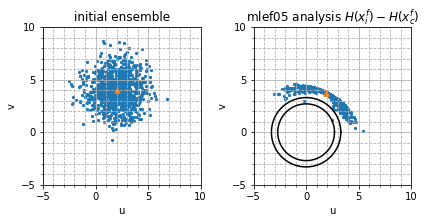

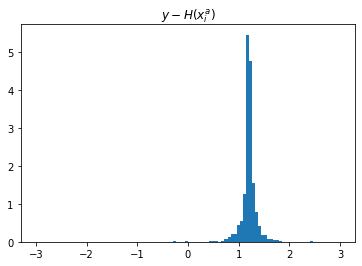

In [14]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
#ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].scatter(xfc[0], xfc[1], s=30, marker='^')
#ax[0].quiver(xfc[0], xfc[1], -djx[0], -djx[1], angles="xy", color="red", scale_units="xy", scale=5.0)
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xc[0], xc[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"mlef05 analysis $H(x^f_i)-H(x^f_c)$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("mlef05_speed_dog.png")
plt.show()

sa = obs.h_operator(xa, htype["operator"], htype["gamma"])
sa -= y
vlim = 3.0 #max(np.max(sa), -np.min(sa))
plt.hist(sa[0], bins=100, density=True, range=(-vlim,vlim))
plt.title(r"$y-H(x^a_i)$")
plt.savefig("mlef05_hist_dog.png")
plt.show()

In [13]:
from mlef2 import analysis as analysis_mlefw
htype = {"operator":"speed","perturbation":"mlef","gamma":1}

xfc = xf_[:]
#xfc = np.array([0.6*np.sqrt(5.0),1.2*np.sqrt(5.0)])
#xfc = np.array([3.0,0.0])
xc, pa, chi2 = analysis_mlefw(xf, xfc, y, rmat, rinv, htype)
xa = xc[:, None] + pa
print(xc - xfc)

2021-02-24 14:00:50,331 anl INFO save_dh=False
2021-02-24 14:00:50,332 anl INFO save_hist=False
2021-02-24 14:00:50,356 anl INFO check_grad=214.84386665957211
2021-02-24 14:00:50,357 anl INFO initial function value = 12.288471493329112
2021-02-24 14:00:50,357 anl INFO initial gradient norm = 740.3201671012974
2021-02-24 14:00:50,365 anl INFO FLAG = -1
2021-02-24 14:00:50,365 anl INFO iteration = 91
2021-02-24 14:00:50,366 anl INFO final function value = 0.0005351092961829024
2021-02-24 14:00:50,366 anl INFO final gradient norm = 0.011626559903652795
2021-02-24 14:00:50,628 anl DEBUG tmat=[[ 9.99914597e-01 -3.65421864e-04  2.97717753e-04 ...  1.50264266e-04
  -2.28269154e-04  7.64781952e-05]
 [-3.65421864e-04  9.98436444e-01  1.27386570e-03 ...  6.42946191e-04
  -9.76711141e-04  3.27232585e-04]
 [ 2.97717753e-04  1.27386570e-03  9.98962152e-01 ... -5.23823324e-04
   7.95749448e-04 -2.66604053e-04]
 ...
 [ 1.50264266e-04  6.42946191e-04 -5.23823324e-04 ...  9.99735616e-01
   4.01631095e-

[-0.60487943 -1.36102722]


In [15]:
import numpy.linalg as la
import obs
from mlef import precondition
from mlef2 import calc_grad_j as calc_grad_jw
dh = obs.h_operator(xf, htype["operator"], htype["gamma"]) - obs.h_operator(xfc, htype["operator"], htype["gamma"])[:, None]
zmat = rmat @ dh
tmat, heinv, condh = precondition(zmat)
pf = xf - xfc[:, None] / np.sqrt(nmem)
gmat = pf@tmat
pfinv = la.pinv(pf) #Moore-penrose pseudo inverse
tinv = la.inv(tmat)
ginv = tinv@pfinv
args = (xfc, pf, y, rinv, htype)
zeta0 = np.zeros(nmem)
djz = calc_grad_jw(zeta0, *args)
djx = pfinv.transpose()@djz
print(djx)

[ 7.29894492 14.74377333]


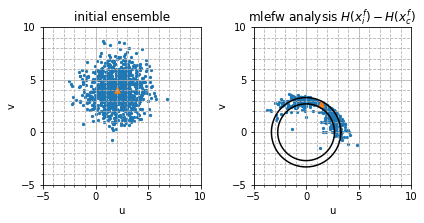

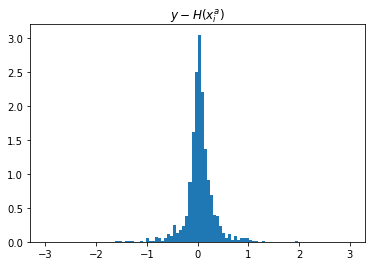

In [14]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
#ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].scatter(xfc[0], xfc[1], s=30, marker='^')
#ax[0].quiver(xfc[0], xfc[1], -djx[0], -djx[1], angles="xy", color="red", scale_units="xy", scale=500.0)
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xc[0], xc[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"mlefw analysis $H(x^f_i)-H(x^f_c)$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("mlefw_speed.png")
plt.show()

sa = obs.h_operator(xa, htype["operator"], htype["gamma"])
sa -= y
vlim = 3.0 #max(np.max(sa), -np.min(sa))
plt.hist(sa[0], bins=100, density=True, range=(-vlim,vlim))
plt.title(r"$y-H(x^a_i)$")
plt.savefig("mlefw_hist.png")
plt.show()

In [14]:
from mlef3 import analysis as analysis_mlef3
htype = {"operator":"speed","perturbation":"mlef","gamma":1}

xfc = xf_[:]
#xfc = np.array([0.6*np.sqrt(5.0),1.2*np.sqrt(5.0)])
#xfc = np.array([3.0,0.0])
xc, pa, chi2, ds = analysis_mlef3(xf, xfc, y, rmat, rinv, htype)
xa = xc[:, None] + pa
print(xc - xfc)

2021-02-22 18:20:21,626 anl INFO save_dh=False
2021-02-22 18:20:21,836 anl INFO save_hist=False
2021-02-22 18:20:49,641 anl INFO check_grad=766.1148546957933
2021-02-22 18:20:49,914 anl INFO initial function value = 12.288471493329112
2021-02-22 18:20:49,915 anl INFO initial gradient norm = 740.3201671012974
2021-02-22 18:20:52,130 anl INFO FLAG = -1
2021-02-22 18:20:52,131 anl INFO iteration = 7
2021-02-22 18:20:52,131 anl INFO final function value = 4438.235614517375
2021-02-22 18:20:52,132 anl INFO final gradient norm = 14249.110305559605
2021-02-22 18:20:52,354 anl INFO DOF = 0.9999567174113964


[ 11.35498209 -25.34235374]


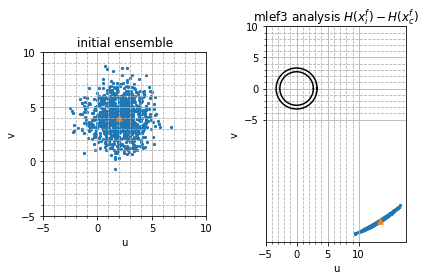

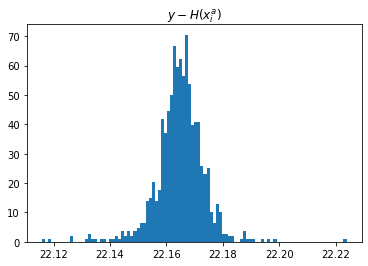

In [17]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
#ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].scatter(xfc[0], xfc[1], s=30, marker='^')
#ax[0].quiver(xfc[0], xfc[1], -djx[0], -djx[1], angles="xy", color="red", scale_units="xy", scale=500.0)
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xc[0], xc[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"mlef3 analysis $H(x^f_i)-H(x^f_c)$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("mlef3_speed.png")
plt.show()

sa = obs.h_operator(xa, htype["operator"], htype["gamma"])
sa -= y
vlim = 3.0 #max(np.max(sa), -np.min(sa))
plt.hist(sa[0], bins=100, density=True) #, range=(-vlim,vlim))
plt.title(r"$y-H(x^a_i)$")
plt.savefig("mlef3_hist.png")
plt.show()

In [15]:
from mlefb import analysis as analysis_mlefb
htype = {"operator":"speed","perturbation":"mlefb","gamma":1}

xa, xa_, pa, chi2, da, condh = analysis_mlefb(xf, xf_, y, rmat, rinv, htype)
print(xa_-xf_)

2021-02-24 14:02:17,412 anl INFO save_dh=False
2021-02-24 14:02:17,794 anl INFO save_hist=False
2021-02-24 14:02:17,870 anl INFO check_grad=2.652763063464072e-05
2021-02-24 14:02:17,871 anl INFO initial function value = 12.288471493366716
2021-02-24 14:02:17,871 anl INFO initial gradient norm = 24.14936961037926
2021-02-24 14:02:17,875 anl INFO FLAG = 0
2021-02-24 14:02:17,875 anl INFO iteration = 6
2021-02-24 14:02:17,875 anl INFO final function value = 0.49696462276974496
2021-02-24 14:02:17,876 anl INFO final gradient norm = 1.0412313572349285e-07
2021-02-24 14:02:18,272 anl INFO DOF = 0.9595548423720462


[-0.62214454 -1.28451198]


In [55]:
from mlefb import precondition as precb
from mlefb import calc_grad_j as calc_grad_jb
dxf = (xf - xf_[:, None])/np.sqrt(1000-1)
eps = 1e-4
emat = xf_[:, None] + eps*dxf
hemat = obs.h_operator(emat, htype["operator"], htype["gamma"])
dh = (hemat - np.mean(hemat, axis=1)[:, None]) / eps
zmat = rmat @ dh
tmat, tinv, heinv, condh = precb(zmat)
pfinv = la.pinv(dxf) #Moore-penrose pseudo inverse
args = (xf_, dxf, y, precb, eps, rmat, htype)
zeta0 = np.zeros(1000)
djz = calc_grad_jb(zeta0, *args)
djx = pfinv.transpose()@djz
print(djx)

[ 7.40960518 15.04350117]


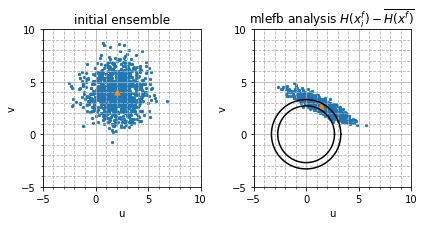

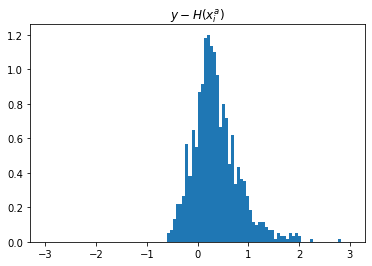

In [16]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
#ax[0].quiver(xf_[0], xf_[1], -djx[0], -djx[1], angles="xy", color="red", scale_units="xy", scale=5.0)
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"mlefb analysis $H(x^f_i)-\overline{H(x^f)}$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("mlefb_speed.png")
plt.show()

sa = obs.h_operator(xa, htype["operator"], htype["gamma"])
sa -= y
vlim = 3.0 #max(np.max(sa), -np.min(sa))
plt.hist(sa[0], bins=100, density=True, range=(-vlim,vlim))
plt.title(r"$y-H(x^a_i)$")
plt.savefig("mlefb_hist.png")
plt.show()

In [17]:
from mleft import analysis as analysis_mleft
htype = {"operator":"speed","perturbation":"mleft","gamma":1}

xa, xa_, pa, chi2, da, condh = analysis_mleft(xf, xf_, y, rmat, rinv, htype)
print(xa_-xf_)

2021-02-24 14:03:10,110 anl INFO save_dh=False
2021-02-24 14:03:10,534 anl INFO save_hist=False
2021-02-24 14:03:17,609 anl INFO check_grad=6.106780072897907
2021-02-24 14:03:17,951 anl INFO initial function value = 16.3939467861474
2021-02-24 14:03:17,951 anl INFO initial gradient norm = 29.860534325486768
2021-02-24 14:03:21,034 anl INFO FLAG = -1
2021-02-24 14:03:21,034 anl INFO iteration = 8
2021-02-24 14:03:21,035 anl INFO final function value = 0.8547292194190134
2021-02-24 14:03:21,035 anl INFO final gradient norm = 2.9537932449406483
2021-02-24 14:03:21,082 anl INFO DOF = 0.9934632539661534


[-0.73845104 -1.62066835]


In [59]:
from mleft import calc_hess
from mleft import calc_grad_j as calc_grad_jt
dxf = (xf - xf_[:, None])/np.sqrt(1000-1)
tmat = np.eye(1000)
tinv = la.inv(tmat)
np.save("tmat.npy", tmat)
np.save("tinv.npy", tinv)
emat = xf_[:, None] + np.sqrt(1000-1)*dxf@tmat
hemat = obs.h_operator(emat, htype["operator"], htype["gamma"])
dh = (hemat - np.mean(hemat, axis=1)[:, None]) @ tinv / np.sqrt(1000-1)
tmat, tinv = calc_hess(dh, rinv)
pfinv = la.pinv(dxf) #Moore-penrose pseudo inverse
args = (xf_, dxf, y, calc_hess, rinv, htype)
zeta0 = np.zeros(1000)
djz = calc_grad_jt(zeta0, *args)
djx = pfinv.transpose()@djz
print(djx)

[ 8.0288661  16.19570469]


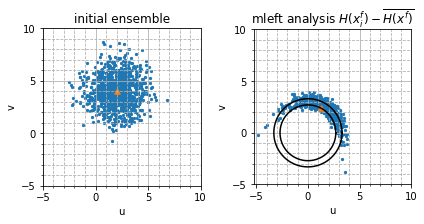

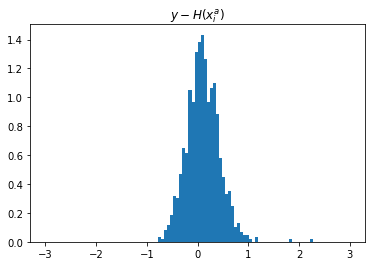

In [18]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
#ax[0].quiver(xf_[0], xf_[1], -djx[0], -djx[1], angles="xy", color="red", scale_units="xy", scale=5.0)
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"mleft analysis $H(x^f_i)-\overline{H(x^f)}$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("mleft_speed.png")
plt.show()

sa = obs.h_operator(xa, htype["operator"], htype["gamma"])
sa -= y
vlim = 3.0 #max(np.max(sa), -np.min(sa))
plt.hist(sa[0], bins=100, density=True, range=(-vlim,vlim))
plt.title(r"$y-H(x^a_i)$")
plt.savefig("mleft_hist.png")
plt.show()

In [16]:
from var import analysis as analysis_var
htype = {"operator":"speed","perturbation":"var","gamma":1}

In [17]:
xa = np.zeros_like(xf)
nmem = xf.shape[1]
for i in range(nmem):
    xa[:,i], chi2 = analysis_var(xf[:,i], binv, y, rinv, htype)
xa_ = np.mean(xa, axis=1)

check_grad=3.185561160428115e-07
success=True message=Optimization terminated successfully.
J=8.272e-01 dJ=2.220e-16 nit=2
check_grad=5.20117524085781e-08
success=True message=Optimization terminated successfully.
J=2.750e-01 dJ=1.222e-15 nit=2
check_grad=1.8671627004219822e-07
success=True message=Optimization terminated successfully.
J=1.109e+00 dJ=9.265e-15 nit=2
check_grad=6.650823191039104e-08
success=True message=Optimization terminated successfully.
J=1.979e-02 dJ=3.103e-17 nit=1
check_grad=2.768670965283099e-07
success=True message=Optimization terminated successfully.
J=8.301e-01 dJ=9.993e-16 nit=2
check_grad=4.078498074763009e-07
success=True message=Optimization terminated successfully.
J=1.051e+00 dJ=3.724e-15 nit=2
check_grad=1.4721406024632215e-06
success=True message=Optimization terminated successfully.
J=4.327e+00 dJ=6.969e-15 nit=3
check_grad=3.255171426445772e-07
success=True message=Optimization terminated successfully.
J=9.137e-01 dJ=4.685e-15 nit=2
check_grad=8.45

success=True message=Optimization terminated successfully.
J=1.052e+00 dJ=2.599e-15 nit=2
check_grad=2.798714718301795e-07
success=True message=Optimization terminated successfully.
J=2.585e+00 dJ=1.897e-15 nit=2
check_grad=2.3509238104758356e-07
success=True message=Optimization terminated successfully.
J=1.092e+00 dJ=1.309e-15 nit=2
check_grad=5.937222008832398e-07
success=True message=Optimization terminated successfully.
J=1.174e+00 dJ=6.251e-15 nit=2
check_grad=5.570540499198923e-07
success=True message=Optimization terminated successfully.
J=3.333e+00 dJ=4.930e-15 nit=3
check_grad=1.3139455444892764e-07
success=True message=Optimization terminated successfully.
J=2.077e-01 dJ=4.003e-16 nit=2
check_grad=9.323641437880189e-08
success=True message=Optimization terminated successfully.
J=2.351e-01 dJ=4.228e-16 nit=2
check_grad=1.6426428493959294e-07
success=True message=Optimization terminated successfully.
J=6.332e-01 dJ=2.483e-16 nit=2
check_grad=5.0320571096923767e-08
success=True

check_grad=8.332340506440372e-07
success=True message=Optimization terminated successfully.
J=3.397e+00 dJ=6.742e-15 nit=3
check_grad=4.226430300272642e-07
success=True message=Optimization terminated successfully.
J=1.066e+00 dJ=1.542e-15 nit=2
check_grad=8.85494597314632e-07
success=True message=Optimization terminated successfully.
J=3.448e+00 dJ=5.979e-16 nit=3
check_grad=7.170936937322809e-08
success=True message=Optimization terminated successfully.
J=5.590e-03 dJ=6.989e-16 nit=1
check_grad=1.1187954456368144e-07
success=True message=Optimization terminated successfully.
J=3.947e-01 dJ=1.624e-15 nit=2
check_grad=1.0997753757411754e-07
success=True message=Optimization terminated successfully.
J=1.158e-01 dJ=1.665e-15 nit=2
check_grad=7.155027307083872e-08
success=True message=Optimization terminated successfully.
J=4.686e-03 dJ=6.989e-16 nit=1
check_grad=7.372034420146399e-08
success=True message=Optimization terminated successfully.
J=3.681e-02 dJ=3.165e-16 nit=1
check_grad=7.73

check_grad=2.2566216569247272e-07
success=True message=Optimization terminated successfully.
J=9.382e-01 dJ=1.669e-15 nit=2
check_grad=9.87194933741245e-07
success=True message=Optimization terminated successfully.
J=2.688e+00 dJ=2.701e-14 nit=2
check_grad=8.523216055701432e-07
success=True message=Optimization terminated successfully.
J=4.784e+00 dJ=1.236e-14 nit=3
check_grad=1.5927442228080526e-07
success=True message=Optimization terminated successfully.
J=3.435e-01 dJ=6.939e-16 nit=2
check_grad=7.758078274007519e-08
success=True message=Optimization terminated successfully.
J=7.437e-01 dJ=4.357e-15 nit=2
check_grad=4.0320506957301925e-07
success=True message=Optimization terminated successfully.
J=1.250e+00 dJ=1.221e-15 nit=2
check_grad=2.0145162547886432e-07
success=True message=Optimization terminated successfully.
J=5.368e-01 dJ=7.850e-16 nit=2
check_grad=1.412620268748388e-07
success=True message=Optimization terminated successfully.
J=2.781e-01 dJ=6.262e-16 nit=2
check_grad=7.

check_grad=7.994614005178929e-07
success=True message=Optimization terminated successfully.
J=1.326e+00 dJ=5.341e-15 nit=2
check_grad=4.464041273581335e-07
success=True message=Optimization terminated successfully.
J=2.277e+00 dJ=1.570e-15 nit=2
check_grad=8.600595077141765e-08
success=True message=Optimization terminated successfully.
J=2.562e-01 dJ=2.756e-15 nit=2
check_grad=3.077842661147833e-07
success=True message=Optimization terminated successfully.
J=1.172e+00 dJ=6.280e-16 nit=2
check_grad=1.4052878676414322e-07
success=True message=Optimization terminated successfully.
J=4.421e-01 dJ=2.632e-15 nit=2
check_grad=9.099881152359798e-07
success=True message=Optimization terminated successfully.
J=2.628e+00 dJ=1.048e-14 nit=2
check_grad=3.6282502872618616e-07
success=True message=Optimization terminated successfully.
J=1.134e+00 dJ=1.132e-15 nit=2
check_grad=5.674932794187635e-07
success=True message=Optimization terminated successfully.
J=1.426e+00 dJ=6.497e-16 nit=2
check_grad=3.7

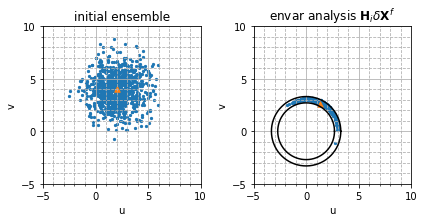

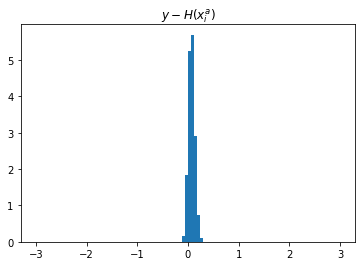

In [18]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"envar analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("envar_speed.png")
plt.show()

sa = obs.h_operator(xa, htype["operator"], htype["gamma"])
sa -= y
vlim = 3.0 #max(np.max(sa), -np.min(sa))
plt.hist(sa[0], bins=100, density=True, range=(-vlim,vlim))
plt.title(r"$y-H(x^a_i)$")
plt.savefig("envar_hist.png")
plt.show()

[[0.43050401]
 [0.85609142]]
7.95496142414696e-07


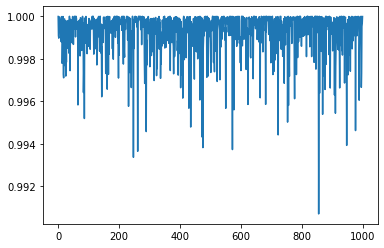

0.007850240416055063


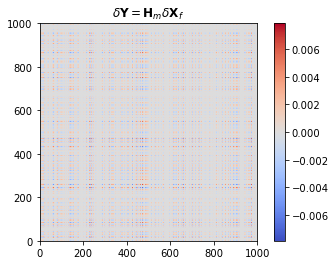

In [36]:
import numpy.linalg as la
cmap = "coolwarm"
# Kalman gain
dxf = xf - xf_[:, None]
jh = obs.dhdx(xf_, htype["operator"], htype["gamma"])
dy = jh @ dxf
dy2 = dy@dy.transpose()
k = dxf@dy.transpose()/(dy2+(1000-1)*sig*sig)
print(k)
A = np.eye(1000) + dy.transpose() @ rinv @ dy / (1000-1)
lam, v = la.eigh(A)
#print(lam[::-1])
T = v @ np.diag(np.sqrt(1.0/lam)) @ v.transpose()
diagt = np.diag(T)
#print(diagt)
print(np.mean(T-np.diag(diagt)))
plt.plot(diagt)
plt.show()
T = T-np.diag(diagt)
xens = np.arange(1000+1)
vlim = max(np.max(T),-np.min(T))
print(vlim)
fig, ax = plt.subplots()
mappable = ax.pcolor(xens, xens, T, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
pp = fig.colorbar(mappable, ax=ax)
plt.rc('text', usetex=True)
ax.set_title(r"$\delta \mathbf{Y} = \mathbf{H}_m \delta \mathbf{X}_f$")
plt.rc('text', usetex=False)
ax.set_aspect("equal")
plt.show()

[[0.36386939]
 [0.73242714]]
-7.901693441555402e-05


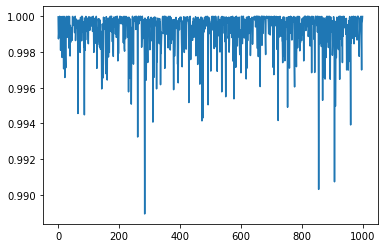

0.010350334377673721


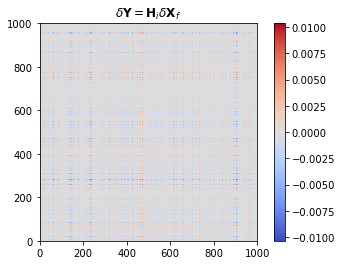

In [37]:
# Kalman gain
dxf = xf - xf_[:, None]
dy = np.zeros((1,1000))
for i in range(1000):
    jhi = obs.dhdx(xf[:,i], htype["operator"], htype["gamma"])
    dy[:,i] = jhi @ dxf[:,i]
dy2 = dy@dy.transpose()
k = dxf@dy.transpose()/(dy2+(1000-1)*sig*sig)
print(k)
A = np.eye(1000) + dy.transpose() @ rinv @ dy / (1000-1)
lam, v = la.eigh(A)
#print(lam[::-1])
T = v @ np.diag(np.sqrt(1.0/lam)) @ v.transpose()
diagt = np.diag(T)
#print(diagt)
print(np.mean(T-np.diag(diagt)))
plt.plot(diagt)
plt.show()
T = T-np.diag(diagt)
xens = np.arange(1000+1)
vlim = max(np.max(T),-np.min(T))
print(vlim)
fig, ax = plt.subplots()
mappable = ax.pcolor(xens, xens, T, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
pp = fig.colorbar(mappable, ax=ax)
plt.rc('text', usetex=True)
ax.set_title(r"$\delta \mathbf{Y} = \mathbf{H}_i \delta \mathbf{X}_f$")
plt.rc('text', usetex=False)
ax.set_aspect("equal")
plt.show()

[[0.43029833]
 [0.85897803]]
7.896997678691015e-07


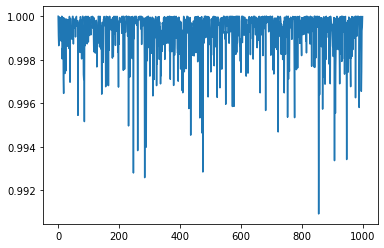

0.008202915796989507


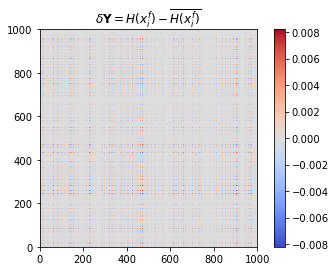

In [38]:
# Kalman gain
dxf = xf - xf_[:, None]
dy = obs.h_operator(xf, htype["operator"], htype["gamma"]) - np.mean(obs.h_operator(xf, htype["operator"], htype["gamma"]), axis=1)[:, None]
dy2 = dy@dy.transpose()
k = dxf@dy.transpose()/(dy2+(1000-1)*sig*sig)
print(k)
A = np.eye(1000) + dy.transpose() @ rinv @ dy / (1000-1)
lam, v = la.eigh(A)
#print(lam[::-1])
T = v @ np.diag(np.sqrt(1.0/lam)) @ v.transpose()
diagt = np.diag(T)
#print(diagt)
print(np.mean(T-np.diag(diagt)))
plt.plot(diagt)
plt.show()
T = T-np.diag(diagt)
xens = np.arange(1000+1)
vlim = max(np.max(T),-np.min(T))
print(vlim)
fig, ax = plt.subplots()
mappable = ax.pcolor(xens, xens, T, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
pp = fig.colorbar(mappable, ax=ax)
plt.rc('text', usetex=True)
ax.set_title(r"$\delta \mathbf{Y} = H(x^f_i) - \overline{H(x^f_i)}$")
plt.rc('text', usetex=False)
ax.set_aspect("equal")
plt.show()

[[0.42062622]
 [0.8396702 ]]
-1.7816457327609125e-05


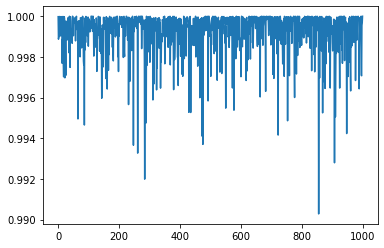

0.008827237111136609


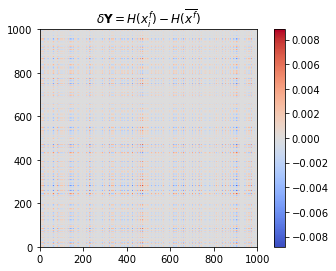

In [39]:
# Kalman gain
dxf = xf - xf_[:, None]
dy = obs.h_operator(xf, htype["operator"], htype["gamma"]) - obs.h_operator(xf_, htype["operator"], htype["gamma"])[:, None]
dy2 = dy@dy.transpose()
k = dxf@dy.transpose()/(dy2+(1000-1)*sig*sig)
print(k)
A = np.eye(1000) + dy.transpose() @ rinv @ dy / (1000-1)
lam, v = la.eigh(A)
#print(lam[::-1])
T = v @ np.diag(np.sqrt(1.0/lam)) @ v.transpose()
diagt = np.diag(T)
#print(diagt)
print(np.mean(T-np.diag(diagt)))
plt.plot(diagt)
plt.show()
T = T-np.diag(diagt)
xens = np.arange(1000+1)
vlim = max(np.max(T),-np.min(T))
print(vlim)
fig, ax = plt.subplots()
mappable = ax.pcolor(xens, xens, T, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
pp = fig.colorbar(mappable, ax=ax)
plt.rc('text', usetex=True)
ax.set_title(r"$\delta \mathbf{Y} = H(x^f_i) - H(\overline{x^f})$")
plt.rc('text', usetex=False)
ax.set_aspect("equal")
plt.show()

In [ ]:
import scipy.optimize as spo
import obs
from mlef import precondition, calc_j, calc_grad_j
htype = {"operator":"speed","perturbation":"mlef","gamma":1}

sig_b = [10.0, 5.0, 2.0, 1.0, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
cg = []
wmean = np.array([2.0,4.0])
nmem = 1000
y = np.array([3.0]) #observation [m/s]
sig = 0.3 #observation error [m/s]
rmat = np.array([1.0 / sig]).reshape(-1,1)
rinv = np.array([1.0 / sig / sig]).reshape(-1,1)   

for i in range(len(sig_b)):
    wstdv = np.array([sig_b[i],sig_b[i]])
    wind = random.multivariate_normal(wmean, np.diag(wstdv), size=nmem)
    xf = wind.transpose()
    xfc = np.mean(xf, axis=1)
    
    dh = obs.h_operator(xf, htype["operator"], htype["gamma"]) - obs.h_operator(xfc, htype["operator"], htype["gamma"])[:, None]
    zmat = rmat @ dh
    tmat, heinv, condh = precondition(zmat)
    pf = xf - xfc[:, None]
    gmat = pf@tmat
    args = (xfc, pf, y, tmat, gmat, heinv, rinv, htype)
    zeta0 = np.zeros(nmem)
    cg.append(spo.check_grad(calc_j, calc_grad_j, zeta0, *args))

[ 2.30258509  1.60943791  0.69314718  0.         -0.69314718 -1.60943791
 -2.30258509 -2.99573227 -3.91202301 -4.60517019]


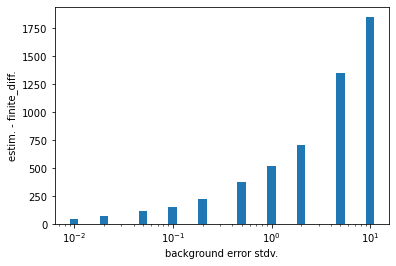

In [27]:
print(np.log(sig_b))
fig, ax = plt.subplots()
ax.bar(sig_b, cg, width=0.2*np.array(sig_b))
ax.set_xticks(sig_b)
ax.set_xlabel("background error stdv.")
ax.set_ylabel("estim. - finite_diff.")
ax.set_xscale("log")
#ax.set_yscale("log")
plt.show()

[0.67       0.81777778 0.96555556 1.11333333 1.26111111 1.40888889
 1.55666667 1.70444444 1.85222222 2.        ]
[1.34164079 2.68328157]


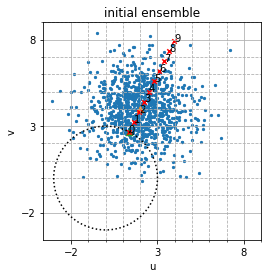

In [15]:
a = np.linspace(0.67, 2.0, 10)
print(a)
xe = np.array([0.6*np.sqrt(5.0),1.2*np.sqrt(5.0)])
print(xe)
x = np.arange(-2,10)
theta = np.linspace(0.0, 2.0*np.pi, 360)
xmin = 3.0*np.cos(theta)
ymin = 3.0*np.sin(theta)
fig, ax = plt.subplots()
ax.scatter(xf[0,:], xf[1,:], s=5)
ax.scatter(xf_[0], xf_[1], s=40, marker='^')
ax.scatter(xe[0], xe[1], s=40, marker='^')
for i in range(a.size):
    y = xf_*a[i]
    ax.scatter(y[0], y[1], s=20, marker='x', color="red")
    ax.text(y[0], y[1], f'{i}', color="black")
#ax.quiver(xf_[0], xf_[1], xe[0], xe[1], angles="xy", color="red")
ax.plot(xmin, ymin, color="black", linestyle='dotted')
#ax.plot(xmax, ymax, color="black")
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_aspect("equal")
ax.set_xticks(x[::5])
ax.set_yticks(x[::5])
ax.set_xticks(x, minor=True)
ax.set_yticks(x, minor=True)
ax.grid(which="major")
ax.grid(which="minor", linestyle="dashed")
ax.set_title("initial ensemble")
fig.savefig("check_grad_a_loc.png")
plt.show()